# **🧍Human Activity Recognition**

In [196]:
# import libraries
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mpl_toolkits import mplot3d
from pylab import rcParams

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam


import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.facecolor':'#ffffff'})

In [197]:
# load data
df_train = pd.read_csv('datasets/train_set.csv')
df_test = pd.read_csv('datasets/test_set.csv')

In [198]:
# shape data
print(f"Train Dataset Shape: {df_train.shape}")
print(f"Test Dataset Shape: {df_test.shape}")

Train Dataset Shape: (72, 38)
Test Dataset Shape: (18, 38)


In [199]:
# missing data counts
print(f"Train Dataset Missing Data Counts: {df_train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {df_test.isna().sum().sum()}")

Train Dataset Missing Data Counts: 0
Test Dataset Missing Data Counts: 0


In [200]:
# duplicates data counts
print(f"Train Dataset Duplicate Data Counts: {df_train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {df_test.duplicated().sum()}")

Train Dataset Duplicate Data Counts: 0
Test Dataset Duplicate Data Counts: 0


findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.


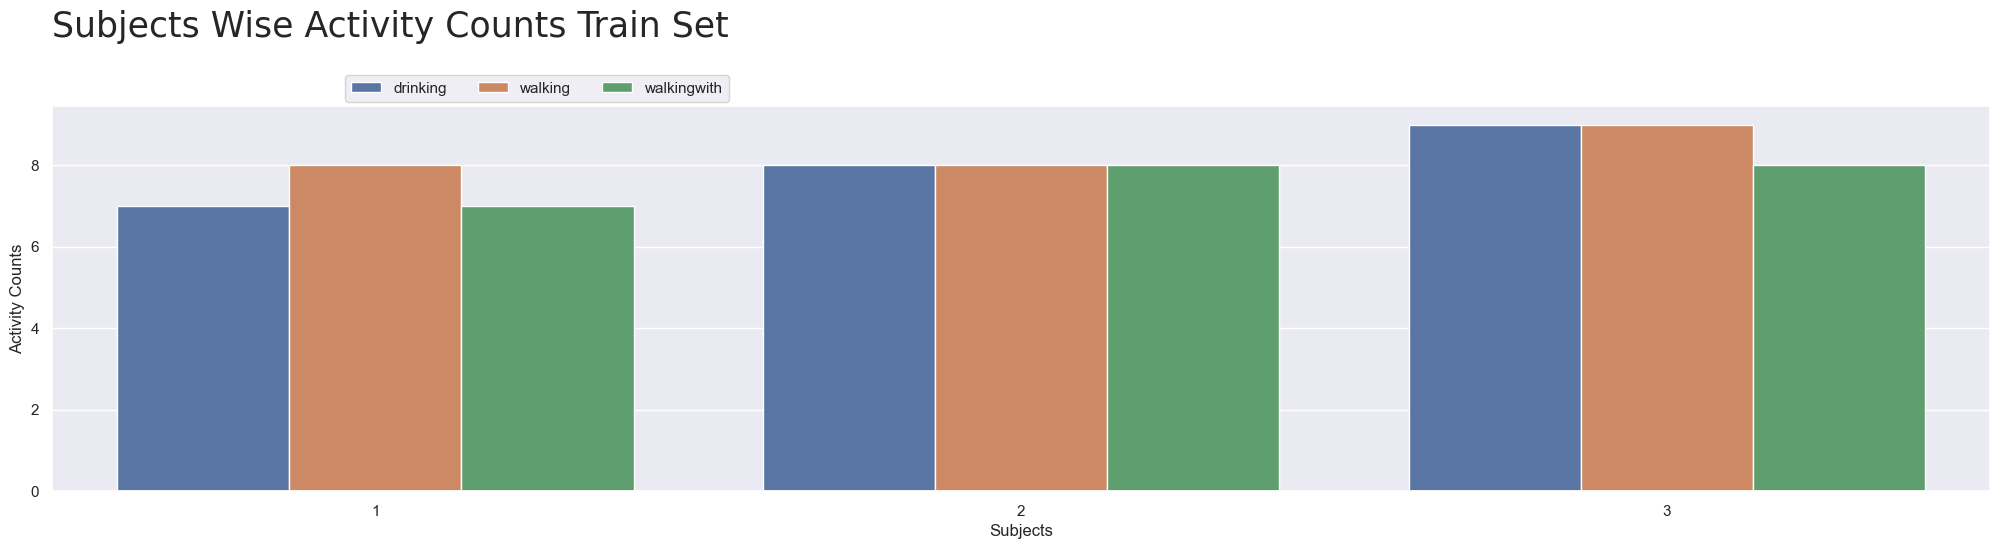

<Figure size 500x500 with 0 Axes>

In [201]:
# check data balanced or not for train
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=df_train, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["drinking", "walking", "walkingwith"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts Train Set", fontsize=25, loc='left', pad=50, fontfamily="roboto")
plt.show()


plt.figure(figsize=(5, 5))
label_counts = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Acticity Counts Distribution Train Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.


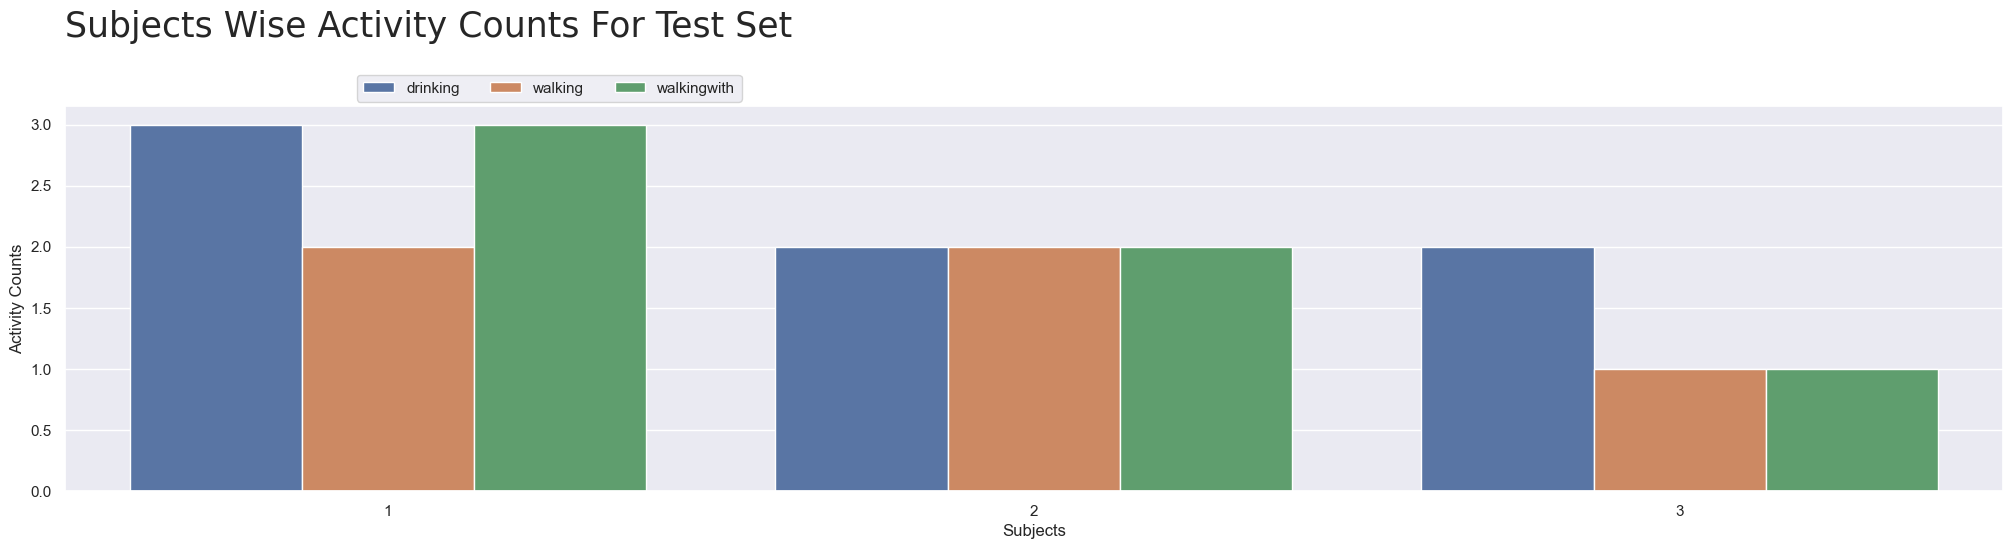

<Figure size 500x500 with 0 Axes>

In [202]:
# check data balanced or not for train
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=df_test, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["drinking", "walking", "walkingwith"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts For Test Set", fontsize=25, loc='left', pad=50, fontfamily="roboto")
plt.show()


plt.figure(figsize=(5, 5))
label_counts = df_test['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Acticity Counts Distribution For Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

In [203]:
# Acticity Counts Distribution For Train & Test Set using pie chart
label_counts_for_train = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

label_counts_for_test = df_test['Activity'].value_counts()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_test.index, values=label_counts_for_test.values, name="Test Set"), 1, 2)

fig.update_layout(
#     height=450, width=1100,
    title = 'Acticity Counts Distribution For Train & Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
#     margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

In [204]:
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig = go.Figure()
fig.add_trace(go.Box(y=df_train['subject'], name="Train Set", notched=True))
fig.add_trace(go.Box( y=df_test['subject'], name="Test Set", notched=True))


fig.update_xaxes(showgrid=False)
fig.update_layout(
    title="Check Outliers In Train & Test",
    height=500, width=500,
    title_font=dict(size=25, color='#a5a7ab', family='Muli'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


In [205]:
# Accelerometer & Gyroscope Columns Counts
lin = 0
acc = 0
gyro = 0
other = 0

for value in df_train.columns:
    if "Linear" in str(value):
        lin += 1
    elif "Acc" in str(value):
        acc += 1
    elif "Gyro" in str(value):
        gyro += 1
    else:
        other += 1

graph = go.Bar(x=['Accelerometer', 'Gyroscope', "Linear", 'Others'], y=[acc,gyro,lin,other], marker = dict(color = colors))
layout = go.Layout(
    height=450, width=500,
    title = 'Accelerometer & Gyroscope Columns Counts',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

In [206]:
corl = df_train.drop(['subject'], axis=1)
encoded_columns = pd.get_dummies(corl['Activity'])
corl = pd.concat([encoded_columns, corl.drop(columns=['Activity'])], axis=1)
#print(corl)
corr_matrix = corl.corr()
corr_matrix["walking"].sort_values(ascending=False)

walking                               1.000000
Linear Acceleration y (m/s^2)_std     0.854779
Linear Acceleration x (m/s^2)_std     0.838585
Linear Acceleration x (m/s^2)_max     0.801277
Gyroscope x (rad/s)_std               0.748054
Gyroscope y (rad/s)_std               0.743683
Gyroscope z (rad/s)_std               0.715002
Acceleration x (m/s^2)_max            0.677213
Gyroscope x (rad/s)_max               0.586792
Acceleration x (m/s^2)_mean           0.576655
Gyroscope z (rad/s)_max               0.493195
Gyroscope y (rad/s)_max               0.484486
Linear Acceleration z (m/s^2)_max     0.373078
Linear Acceleration x (m/s^2)_mean    0.324364
Linear Acceleration z (m/s^2)_mean    0.318132
Acceleration y (m/s^2)_std            0.308860
Linear Acceleration y (m/s^2)_max     0.283337
Acceleration x (m/s^2)_std            0.227211
Acceleration x (m/s^2)_min            0.155995
Linear Acceleration z (m/s^2)_std     0.151835
Acceleration z (m/s^2)_std            0.000855
Acceleration 

In [207]:
corr_matrix["walkingwith"].sort_values(ascending=False)

walkingwith                           1.000000
Acceleration z (m/s^2)_mean           0.934921
Linear Acceleration z (m/s^2)_std     0.613086
Gyroscope z (rad/s)_min               0.591595
Gyroscope y (rad/s)_min               0.565143
Acceleration y (m/s^2)_min            0.556409
Gyroscope x (rad/s)_min               0.421871
Acceleration z (m/s^2)_min            0.413521
Linear Acceleration y (m/s^2)_min     0.379359
Acceleration z (m/s^2)_max            0.312413
Linear Acceleration z (m/s^2)_max     0.310240
Linear Acceleration x (m/s^2)_min     0.307972
Acceleration x (m/s^2)_min            0.284386
Acceleration y (m/s^2)_mean           0.274520
Linear Acceleration y (m/s^2)_mean    0.247314
Acceleration z (m/s^2)_std            0.234122
Gyroscope z (rad/s)_mean              0.186151
Gyroscope y (rad/s)_mean              0.121785
Gyroscope x (rad/s)_mean              0.100424
Linear Acceleration z (m/s^2)_mean    0.051620
Linear Acceleration z (m/s^2)_min     0.011427
Linear Accele

In [208]:
corr_matrix["drinking"].sort_values(ascending=False)

drinking                              1.000000
Acceleration y (m/s^2)_mean           0.657184
Acceleration x (m/s^2)_std            0.567132
Linear Acceleration y (m/s^2)_mean    0.541017
Acceleration y (m/s^2)_max            0.517519
Linear Acceleration y (m/s^2)_min     0.476696
Acceleration y (m/s^2)_std            0.461210
Linear Acceleration x (m/s^2)_min     0.308189
Linear Acceleration z (m/s^2)_min     0.298507
Acceleration y (m/s^2)_min            0.285818
Gyroscope y (rad/s)_mean              0.142355
Linear Acceleration y (m/s^2)_max     0.108108
Gyroscope y (rad/s)_max               0.100413
Gyroscope x (rad/s)_min               0.099784
Gyroscope z (rad/s)_min               0.092104
Gyroscope z (rad/s)_max               0.045270
Gyroscope x (rad/s)_mean             -0.002640
Gyroscope z (rad/s)_mean             -0.023538
Gyroscope y (rad/s)_min              -0.036921
Acceleration x (m/s^2)_max           -0.093255
Gyroscope z (rad/s)_std              -0.182572
Gyroscope x (

In [209]:
# update columns name
columns_name = df_train.columns

columns_name = columns_name.str.replace('[()]','')
columns_name = columns_name.str.replace('[-]', '')
columns_name = columns_name.str.replace('[,]','')

df_train.columns = columns_name
df_train.columns = columns_name

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.000s...
[t-SNE] Computed neighbors for 72 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 21.202668
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.459499
[t-SNE] KL divergence after 1000 iterations: 0.025495


<Axes: >

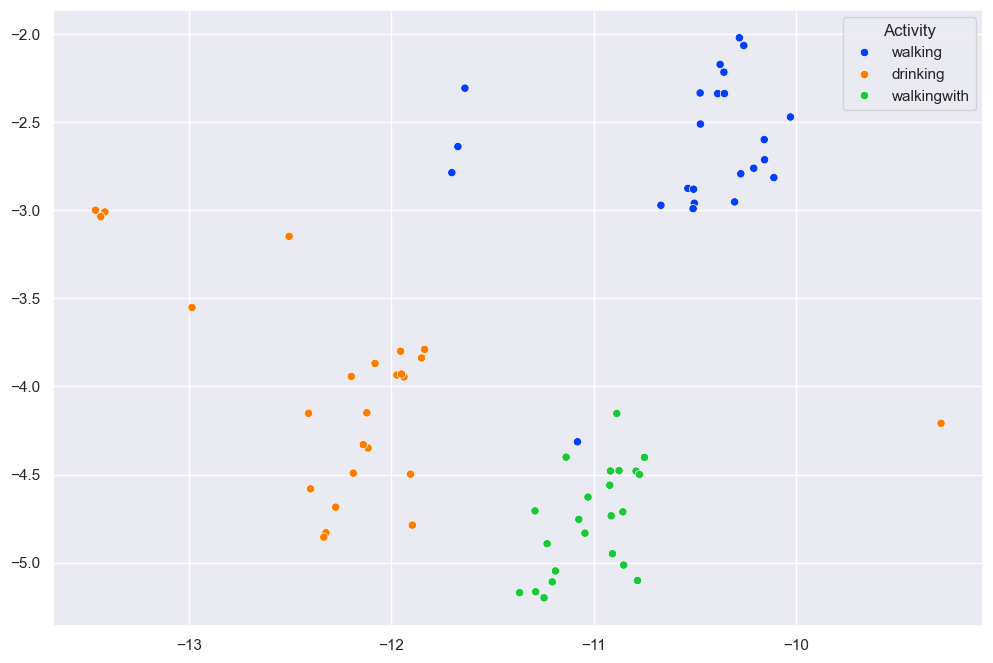

In [210]:
# t-sne (2D)
x_for_tsne = df_train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df_train["Activity"],palette="bright")

In [211]:
# t-sne (3D)
x_for_tsne = df_train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=3, verbose=1, perplexity=45, n_iter=1000).fit_transform(x_for_tsne)

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.000s...
[t-SNE] Computed neighbors for 72 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 18.908332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.980064
[t-SNE] KL divergence after 1000 iterations: 0.976722


In [212]:
fig = px.scatter_3d(
    x =tsne[:, 0],
    y = tsne[:, 1],
    z = tsne[:, 2],
    color=df_train['Activity']
)
fig.update_layout(
    title="Cluster Of Activities",
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.show()

In [213]:
X_train, y_train = df_train.drop(['subject', 'Activity'], axis=1), df_train['Activity']

In [214]:
X_test, y_test = df_test.drop(['subject', 'Activity'], axis=1), df_test['Activity']

In [215]:
# pca with all comonents
pca = PCA()
X_pca = pca.fit_transform(X_train)

# print(pca.n_components_)
# print(pca.explained_variance_ratio_)
# print(np.cumsum(pca.explained_variance_ratio_))
fig = px.line(np.cumsum(pca.explained_variance_ratio_))
fig.update_layout(
    title="Screeplot Of All Principsl Components",
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    paper_bgcolor='#2d3035', plot_bgcolor='#2d3035',
    font=dict(color='#a5a7ab'),
    showlegend=False,
    

)
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='#a5a7ab')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#a5a7ab')


In [216]:
# pca with 95% info
pca = PCA(0.95)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [217]:
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [218]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72, 6), (72,), (18, 6), (18,))

In [219]:
# ML Modelling

In [220]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(15,5)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [221]:
# logistic regresssion
lr_model = LogisticRegression()

params = {
    'C': np.arange(10,61,10),
    'penalty': ['l2','l1']
}

random_cv = RandomizedSearchCV(lr_model, param_distributions=params, cv=5, random_state=42)
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([10, 20, 30, 40, 50, 60]),
                                        'penalty': ['l2', 'l1']},
                   random_state=42)

In [222]:
lr_model = LogisticRegression(penalty='l2', C=10,solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 0)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", lr_accuracy)

Accuracy Of Logistic Regression :  1.0


[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[[5 0 0]
 [0 6 0]
 [0 0 7]]


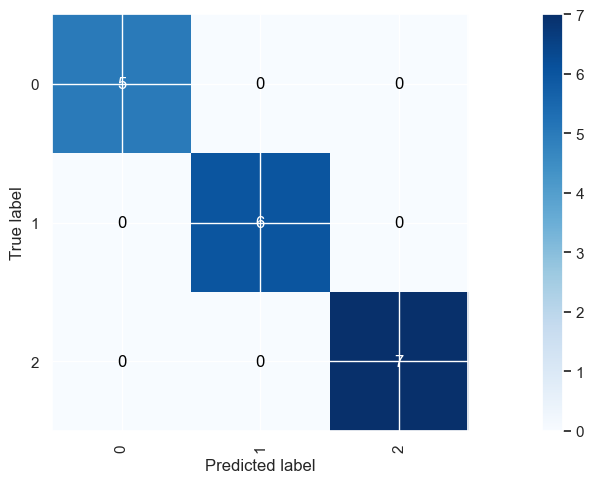

In [223]:
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,np.unique(y_pred))

In [224]:
# svc
params = {
    'C':[2,4,8,16],
    'gamma': [0.125, 0.250, 0.5, 1]
}
svm_model = SVC(kernel='rbf')

random_cv = RandomizedSearchCV(svm_model, param_distributions=params, random_state = 42, verbose=10)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=2, gamma=0.125...........................................
[CV 1/5; 1/10] END ............C=2, gamma=0.125;, score=0.933 total time=   0.0s
[CV 2/5; 1/10] START C=2, gamma=0.125...........................................
[CV 2/5; 1/10] END ............C=2, gamma=0.125;, score=0.733 total time=   0.0s
[CV 3/5; 1/10] START C=2, gamma=0.125...........................................
[CV 3/5; 1/10] END ............C=2, gamma=0.125;, score=0.857 total time=   0.0s
[CV 4/5; 1/10] START C=2, gamma=0.125...........................................
[CV 4/5; 1/10] END ............C=2, gamma=0.125;, score=0.714 total time=   0.0s
[CV 5/5; 1/10] START C=2, gamma=0.125...........................................
[CV 5/5; 1/10] END ............C=2, gamma=0.125;, score=1.000 total time=   0.0s
[CV 1/5; 2/10] START C=2, gamma=0.25............................................
[CV 1/5; 2/10] END .............C=2, gamma=0.25;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [2, 4, 8, 16],
                                        'gamma': [0.125, 0.25, 0.5, 1]},
                   random_state=42, verbose=10)

In [225]:
random_cv.best_params_

{'gamma': 0.125, 'C': 2}

In [226]:
svc_model = SVC(gamma=0.125, C=2)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", svc_accuracy)

Accuracy Of Logistic Regression :  0.8888888888888888


[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[1 2 2 1 0 2 0 0 0 1 2 0 2 2 0 0 1 2]
[[5 0 0]
 [2 4 0]
 [0 0 7]]


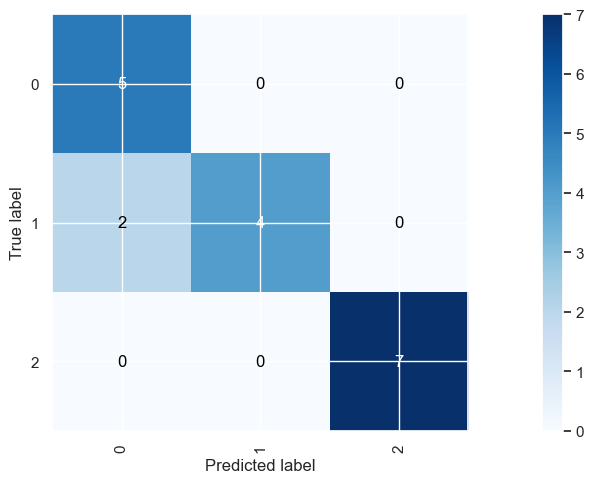

In [227]:
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,np.unique(y_pred))

In [228]:
# decision tree
params = {'max_depth':np.arange(2,10,2)}

dt_model = DecisionTreeClassifier()
random_cv = RandomizedSearchCV(dt_model, param_distributions=params, random_state = 42)
random_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [229]:
random_cv.best_params_

{'max_depth': 8}

In [230]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", dt_accuracy)

Accuracy Of Logistic Regression :  0.9444444444444444


[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[1 2 2 1 0 2 1 0 1 1 2 0 2 2 1 0 1 2]
[[4 1 0]
 [0 6 0]
 [0 0 7]]


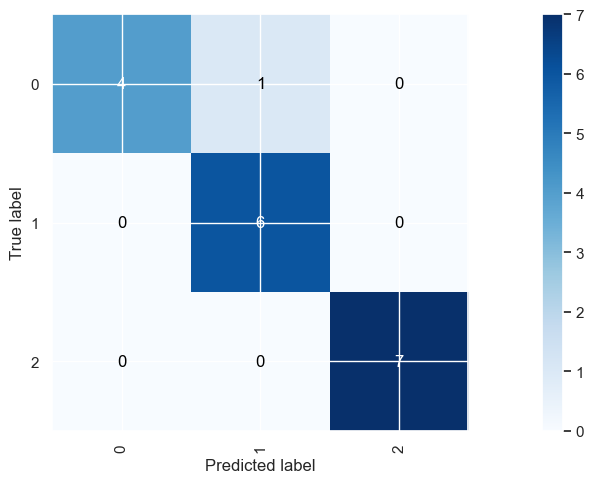

In [231]:
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,np.unique(y_pred))

In [232]:
# random forest
params = {
    'n_estimators': np.arange(20,101,10),
    'max_depth':np.arange(2,16,2),
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]
}
rf_model = RandomForestClassifier()
random_cv = RandomizedSearchCV(rf_model, param_distributions=params,random_state = 42, verbose=10)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, n_estimators=50
[CV 1/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, n_estimators=50
[CV 2/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, n_estimators=50
[CV 3/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, n_estimators=50
[CV 4/5; 1/10] END bootstrap=False, max_depth=6, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 1/10] START bootstrap=False, max_depth=6, max_features=auto, n_estimators=50
[CV 5/5; 1/10] END bootstrap=False, max_depth=6, 

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42, verbose=10)

In [233]:
random_cv.best_params_

{'n_estimators': 20, 'max_features': 'sqrt', 'max_depth': 2, 'bootstrap': True}

In [234]:
rf_model = RandomForestClassifier(n_estimators=90,
                                  max_features=56,
                                  max_depth=14,
                                  bootstrap=True)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", rf_accuracy)

Accuracy Of Logistic Regression :  1.0


[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[[5 0 0]
 [0 6 0]
 [0 0 7]]


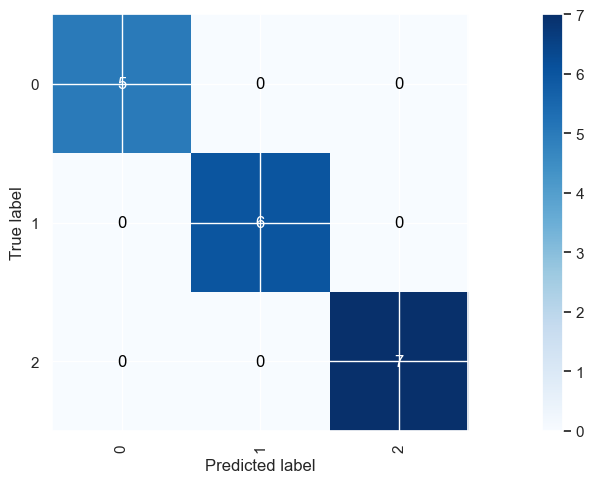

In [235]:
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,np.unique(y_pred))

In [236]:
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", xgb_accuracy)

Accuracy Of Logistic Regression :  1.0


In [237]:

estimators = [
        ('RFC' ,RandomForestClassifier(n_estimators=500, random_state = 42)),
        ('KNC', KNeighborsClassifier(5)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', SVC(kernel="rbf")),
        ('XGB', xgboost.XGBClassifier()),
        ('RC',  RidgeClassifier())
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier()
)

In [238]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [239]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

1.0

[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[1 2 2 1 0 2 0 0 1 1 2 0 2 2 1 0 1 2]
[[5 0 0]
 [0 6 0]
 [0 0 7]]


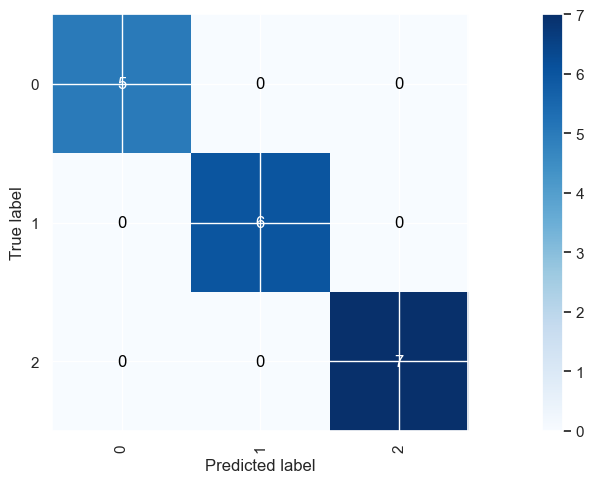

In [240]:
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,np.unique(y_pred))

In [241]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [242]:
history=model.fit(X_train,y_train,batch_size=256,epochs=6,validation_data=(X_test,y_test))

Epoch 1/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3056 - loss: 1.7895 - val_accuracy: 0.8889 - val_loss: 1.7801
Epoch 2/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8333 - loss: 1.7815 - val_accuracy: 0.9444 - val_loss: 1.7718
Epoch 3/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9306 - loss: 1.7735 - val_accuracy: 1.0000 - val_loss: 1.7623
Epoch 4/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9583 - loss: 1.7645 - val_accuracy: 1.0000 - val_loss: 1.7512
Epoch 5/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9861 - loss: 1.7540 - val_accuracy: 1.0000 - val_loss: 1.7380
Epoch 6/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9861 - loss: 1.7414 - val_accuracy: 1.0000 - val_loss: 1.7222


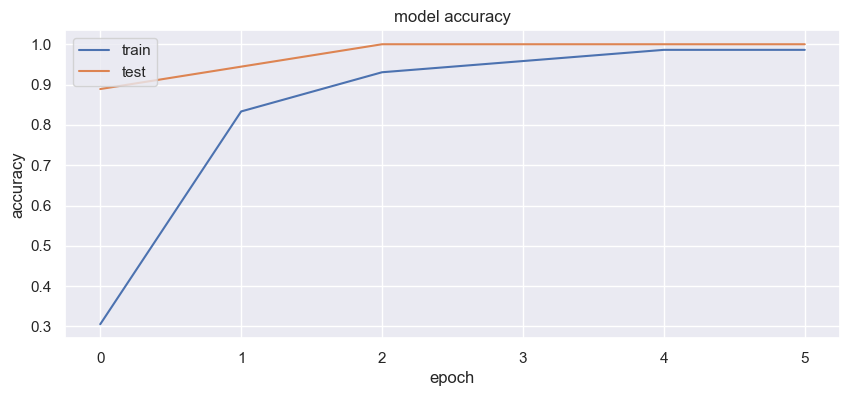

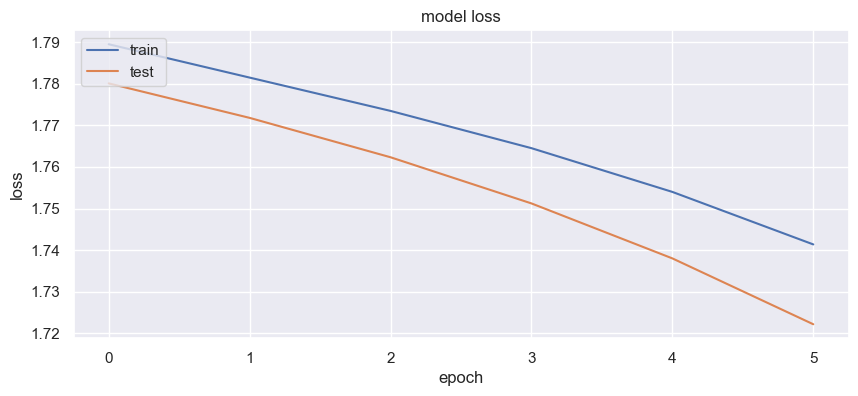

In [243]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [244]:
model_name = ['LR', 'SVC', 'DT', 'RF', 'XGB', 'Stacking', 'DeepLearning']
model_acc1 = [ lr_accuracy, svc_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, 0.93827, 0.959]
model_acc = [np.round(i, decimals=2) for i in model_acc1]

In [245]:

graph = go.Bar(
    x=model_name,
    y=model_acc,
    opacity=1,
    showlegend=False,
    marker=dict(color=px.colors.qualitative.Pastel1)

)

layout = go.Layout(
    height=450, width=700,
    title = 'Model Accuracy Chart',
    xaxis = dict(title = 'Model', showgrid=False,tickangle=0),
    yaxis = dict(title = 'Accuracy', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
iplot(fig)
